# Midterm Part 1 - _Due Monday, September 19_
---
## Note: this is part of the midterm. It is _not_ a paired programming assignment. **You must complete this lab _on your own_**. 
---
### We'll be exploring the Pokemon dataset from [Kaggle](http://www.kaggle.com).
The dataset was downloaded from https://www.kaggle.com/abcsds/pokemon. 

1. sign up or log in
2. accept terms and conditions (if necessary)
3. download `pokemon.zip`
4. unzip it to your local directory

After loading and cleaning the data:

+ **SQL**: 
    - Which Pokemon seems the most useful (largest `Total` value)?
    - Come up with at least one other question that can be answered using SQL (and answer it).
+ **EDA**: 
    - Calculate the percent of distinct Pokemon that are Legendary (distinct means unique Pokemon `#`).
    - Make at least one barplot of a categorical variable
    - Make at least one boxplot of continuous variables
    - Make at least one boxplot of continuous variables grouped by a categorical variable
+ **EDA/Statistics**: 
    - Calculate the mean and standard deviation of the `total` column for each Pokemon Type 1.
    - Calculate the mean and standard deviation of at least one other continuous variable
+ **Statistics/Random Sampling** - For the following questions, draw a sample of 100:
    - Compare sample statistics & population statistics for Attack points.
    - Make histograms of the Attack points sample & Attack points population.
    - Compare sample statistics & population statistics for at least one other continuous variable.
    - Make histograms of the Attack points sample & at least one other continuous variable in the population.
+ **Probability**: Assume you are a Pokemaster and have caught every Pokemon. You pick 6 Pokemon at random to carry.
     - What's the probability that they are all Water type? (probability of a Pokemon with Type 1 or Type 2 of `Water`)
     - Come up with at least one more scenario for your set of six Pokemon and compute the probability of getting it.

***
## Setup & clean the data
### First, load the packages that will be used in this notebook.

In [47]:
%pylab inline

import pandas as pd
import seaborn as sns

from sqlalchemy import create_engine

random.seed(1234)
sns.set(font_scale=1.5)

Populating the interactive namespace from numpy and matplotlib


### Next, load the csv file into a DataFrame and look at the first few lines.

In [48]:
df = pd.read_csv('Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Here are some variable descriptions from the Kaggle website:

|Variable|Description|
|:-:|:--|
|**#**|ID for each pokemon|
|**Name**|Name of each pokemon|
|**Type 1**|Each pokemon has a type, this determines weakness/resistance to attacks|
|**Type 2**|Some pokemon are dual type and have 2|
|**Total**|sum of all stats that come after this, a general guide to how strong a pokemon is|
|**HP**|hit points, or health, defines how much damage a pokemon can withstand before fainting|
|**Attack**|the base modifier for normal attacks (eg. Scratch, Punch)|
|**Defense**|the base damage resistance against normal attacks|
|**SP. Atk**|special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)|
|**SP. Def**|the base damage resistance against special attacks|
|**Speed**|determines which pokemon attacks first each round|
|**Generation**|the number of the generation a pokemon belongs to
|**Legendary**|boolean value indicating if a pokemon is Legendary (True) or not Legendary (False)|

Notice that there are multiple entries for Pokemon \#3 (Venusaur). We won't be able to set `#` as the index since it contains duplicates.

We can also modify the column names to get rid of periods and spaces. The column names should also be lowercased for use with SQLite.

In [49]:
# Lowercase and replace periods & spaces in the column names
new_names = []

for col in df.columns:
    new_names.append(col.replace('.', '', len(col)).replace(' ', '', len(col)).lower())

df.columns = new_names

print(df.columns)

Index(['#', 'name', 'type1', 'type2', 'total', 'hp', 'attack', 'defense',
       'spatk', 'spdef', 'speed', 'generation', 'legendary'],
      dtype='object')


Let's also convert `Legendary` to a binary column, where `1` represents `True` and `0` represents `False`.

Python's lambda functions are useful for defining functions in-line. You can read more at:<br>
https://pythonconquerstheuniverse.wordpress.com/2011/08/29/lambda_tutorial/<br>
http://stackoverflow.com/questions/890128/why-are-python-lambdas-useful

In [50]:
df['legendary'] = df['legendary'].apply(lambda x: 1 if x == True else 0)
df.head()

,#,name,type1,type2,total,hp,attack,defense,spatk,spdef,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,0


### Next, load the data into SQL

First we'll need to create a database, then create a table in our new database.

In [51]:
# Create pokemon table in pokemon database (only run this once!)
engine = create_engine('sqlite:///pokemon.db')
conn = engine.connect()
df.to_sql('pokemon', conn)

ValueError: Table 'pokemon' already exists.

In [52]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [53]:
%sql sqlite://

'Connected: None@None'

In [60]:
%sql sqlite:///pokemon.db

'Connected: None@pokemon.db'

In [92]:
%%sql
SELECT * FROM pokemon LIMIT 3;

Done.


index,#,name,type1,type2,total,hp,attack,defense,spatk,spdef,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0


# SQL:
Which Pokemon seems the most useful (largest Total value)?

In [75]:
%%sql
SELECT max(total),name, hp, attack, defense FROM pokemon;

Done.


max(total),name,hp,attack,defense
780,MewtwoMega Mewtwo X,106,190,100


MewtwoMega Mewtwo X seems to be the most powerful Pokemon based upon having the largest total value.

# SQL: 
What is the mean attack, defense, hp, and total for each type of pokemon?

In [83]:
%%sql
SELECT AVG(attack) as average_attack, AVG(defense) as average_defense, AVG(hp) as average_hp, 
AVG(total) as average_total, type1
FROM pokemon
GROUP BY type1
ORDER BY average_total DESC;

Done.


average_attack,average_defense,average_hp,average_total,type1
112.125,86.375,83.3125,550.53125,Dragon
92.70370370370371,126.37037037037037,65.22222222222223,487.7037037037037,Steel
78.75,66.25,70.75,485.0,Flying
71.45614035087719,67.6842105263158,70.63157894736842,475.94736842105266,Psychic
84.76923076923077,67.76923076923077,69.90384615384616,458.0769230769231,Fire
92.86363636363636,100.79545454545455,65.36363636363636,453.75,Rock
88.38709677419355,70.2258064516129,66.80645161290323,445.741935483871,Dark
69.0909090909091,66.29545454545455,59.79545454545455,443.40909090909093,Electric
73.78125,81.1875,64.4375,439.5625,Ghost
95.75,84.84375,73.78125,437.5,Ground


# Calculate the percent of distinct Pokemon that are Legendary (distinct means unique Pokemon #).

In [85]:
import pandas as pd
from pandas import DataFrame as df


In [87]:
pokemon_df = pd.read_sql('pokemon',conn)

In [88]:
print(type(pokemon_df))

<class 'pandas.core.frame.DataFrame'>


In [102]:
pokemon_df.dtypes.index

Index(['index', '#', 'name', 'type1', 'type2', 'total', 'hp', 'attack',
       'defense', 'spatk', 'spdef', 'speed', 'generation', 'legendary'],
      dtype='object')

In [227]:
pokemon_df.head()

,index,name,type1,type2,total,hp,attack,defense,spatk,spdef,speed,generation,legendary,pokemon_number
0,0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0,1
1,1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0,2
2,2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0,3
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0,3
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,0,4


In [110]:
pokemon_df['pokemon_number'] = pokemon_df['#']  

In [240]:
#Number of unique Pokemon that are legendary
unique_and_legendary =  pokemon_df.drop_duplicates(['pokemon_number'])
unique_and_legendary = unique_and_legendary[unique_and_legendary.legendary==1]
unique_lengendary = unique_and_legendary.legendary.sum()

In [241]:
unique_lengendary/max(pokemon_df.pokemon_number)

0.063800277392510402

About 6.4% of unique pokemon are legendary. 

# Make at least one barplot of a categorical variable

In [147]:
import seaborn as sns
#from seaborn import barplot

#barplot('brand', 'price', data=laptops);

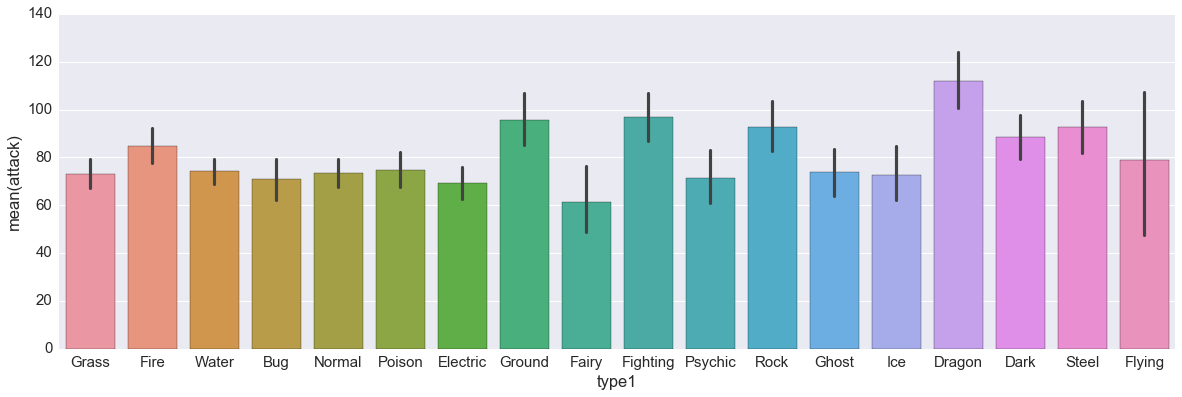

In [253]:
plt.figure(figsize=([20,6]))
sns.barplot(x=pokemon_df.type1, y= pokemon_df.attack)


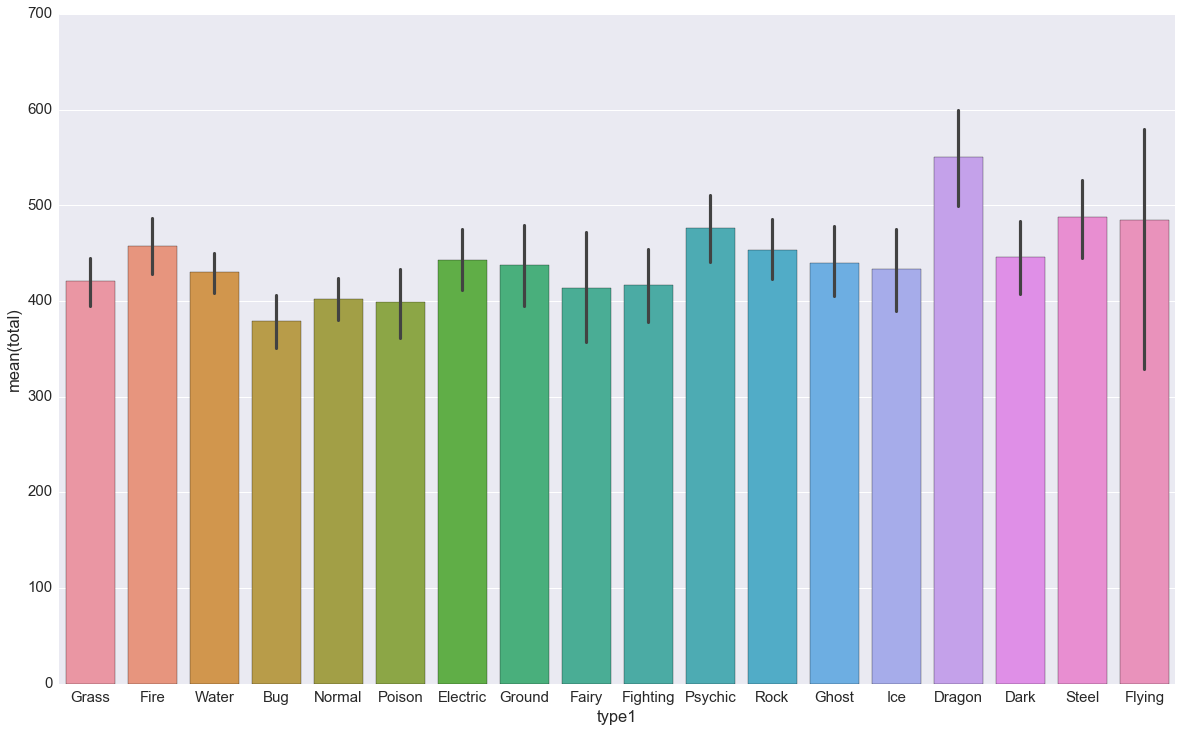

In [280]:
plt.figure(figsize=([20,12]))
sns.barplot(x=pokemon_df.type1, y= pokemon_df.total)

# Make at least one boxplot of continuous variables

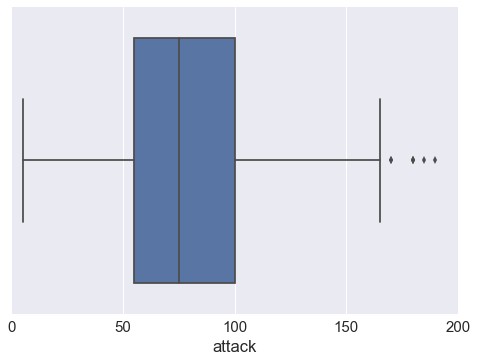

In [254]:

sns.boxplot(x=pokemon_df.attack )

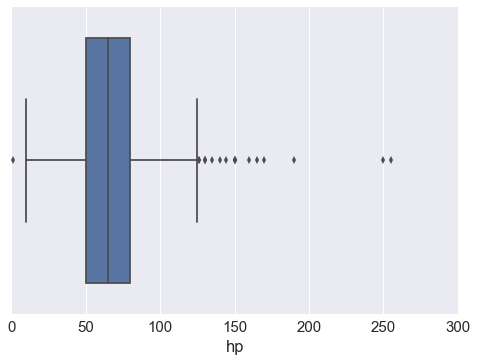

In [257]:

sns.boxplot(x=pokemon_df.hp)

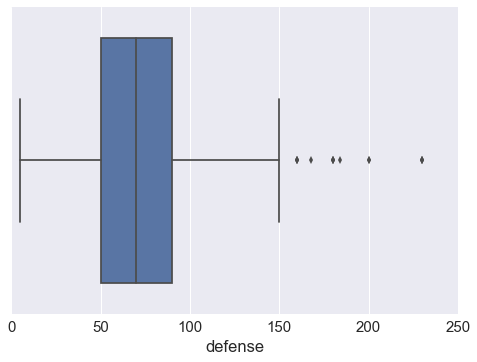

In [275]:
sns.boxplot(x=pokemon_df.defense)

# Make at least one boxplot of continuous variables grouped by a categorical variable

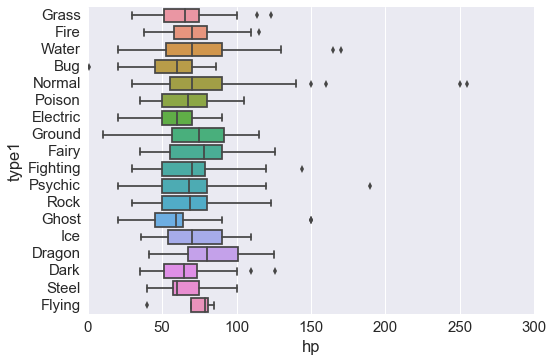

In [255]:

sns.boxplot(x=pokemon_df.hp , y=pokemon_df.type1)

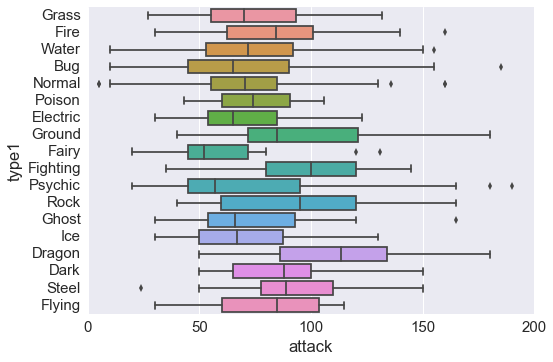

In [259]:

sns.boxplot(x=pokemon_df.attack , y=pokemon_df.type1)

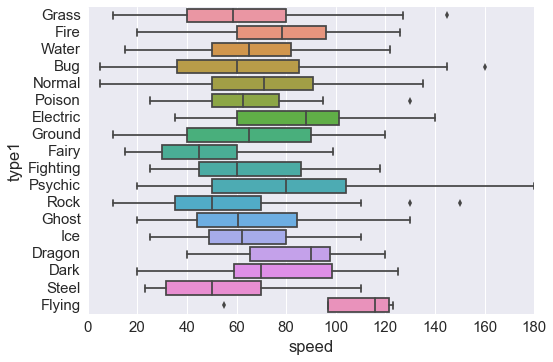

In [260]:

sns.boxplot(x=pokemon_df.speed , y=pokemon_df.type1)

# Calculate the mean and standard deviation of the total column for each Pokemon Type 1.


In [267]:
type1_grouped = pokemon_df.groupby('type1')['total'].describe()

In [268]:
type1_grouped

type1          
Bug       count     69.000000
          mean     378.927536
          std      117.875223
          min      194.000000
          25%      269.000000
          50%      395.000000
          75%      475.000000
          max      600.000000
Dark      count     31.000000
          mean     445.741935
          std      109.126217
          min      220.000000
          25%      359.000000
          50%      465.000000
          75%      510.000000
          max      680.000000
Dragon    count     32.000000
          mean     550.531250
          std      146.267538
          min      300.000000
          25%      420.000000
          50%      600.000000
          75%      680.000000
          max      780.000000
Electric  count     44.000000
          mean     443.409091
          std      105.721952
          min      205.000000
          25%      362.250000
          50%      477.500000
                      ...    
Psychic   std      139.026645
          min      198.0

# Calculate the mean and standard deviation of at least one other continuous variable

In [271]:
pokemon_df.attack.describe()

count    800.000000
mean      79.001250
std       32.457366
min        5.000000
25%       55.000000
50%       75.000000
75%      100.000000
max      190.000000
Name: attack, dtype: float64

In [272]:
pokemon_df.hp.describe()

count    800.000000
mean      69.258750
std       25.534669
min        1.000000
25%       50.000000
50%       65.000000
75%       80.000000
max      255.000000
Name: hp, dtype: float64

In [273]:
pokemon_df.speed.describe()

count    800.000000
mean      68.277500
std       29.060474
min        5.000000
25%       45.000000
50%       65.000000
75%       90.000000
max      180.000000
Name: speed, dtype: float64